# Customer Segmentation Using K-Means Clustering

### Overview
In this project, K-Means clustering is used to segment mall customers
based on their annual income and spending behavior.

The goal is to identify distinct customer groups that can help businesses
design targeted marketing strategies instead of treating all customers equally.

### Project Type
Unsupervised Machine Learning | Clustering

### Platform
Kaggle Notebook


## Business Objective

The objective of this project is to segment customers into distinct groups using
K-Means clustering based on their annual income and spending behavior.

This segmentation enables businesses to design targeted marketing strategies
instead of applying a one-size-fits-all approach.

In [1]:
import numpy as np              # for math operations
import pandas as pd             # for loading & handling data
import matplotlib.pyplot as plt # for plotting graphs


***The required libraries for data handling, numerical computation, and visualizationare imported.***




In [2]:
data_set  = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")



***The Mall Customers dataset is successfully loaded.Each row represents a unique customer with demographic and spending information.***




In [3]:
data_set.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data_set.rename(columns={'Genre':'Gender'},inplace=True)


***The column name 'Genre' appears to be a typographical error.It has been renamed to 'Gender' to improve clarity and consistency**.*




In [5]:
data_set.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Dataset Structure and Quality Check

The dataset contains 200 customer records and 5 attributes.
All columns have complete data with no missing values, which makes the dataset
suitable for clustering without additional data cleaning.

- 4 numerical features: Age, Annual Income, Spending Score, CustomerID
- 1 categorical feature: Gender
- Memory usage is low, making the dataset efficient to process


In [7]:
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Statistical Summary of Numerical Features

The statistical summary provides insights into customer demographics
and spending behavior:

- Customer ages range from 18 to 70 years, with an average age of approximately 39.
- Annual income varies significantly, ranging from $15k to $137k,
  indicating a diverse customer base.
- Spending Score ranges from 1 to 99, showing a wide variation in customer
  purchasing behavior.
- The average spending score is close to 50, suggesting a balanced mix
  of low and high spending customers.


In [8]:
x = data_set.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## Feature Selection

Annual Income and Spending Score are selected because they directly represent
a customer's purchasing power and spending behavior, which are essential
for behavioral customer segmentation.

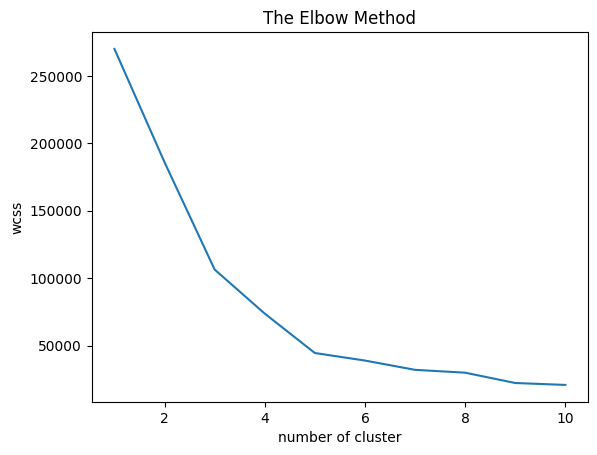

In [9]:
#using the elbow method to find the optimal number of cluster.
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('number of cluster')
plt.ylabel('wcss')  #within cluster some of squares
plt.show()

## Elbow Method Interpretation

The WCSS value decreases sharply as the number of clusters increases from 1 to 5.
After K = 5, the reduction in WCSS becomes gradual.

This indicates that K = 5 is an optimal number of clusters, balancing model
simplicity and cluster compactness.


In [10]:
#Fitting K means to the data_set
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(x)

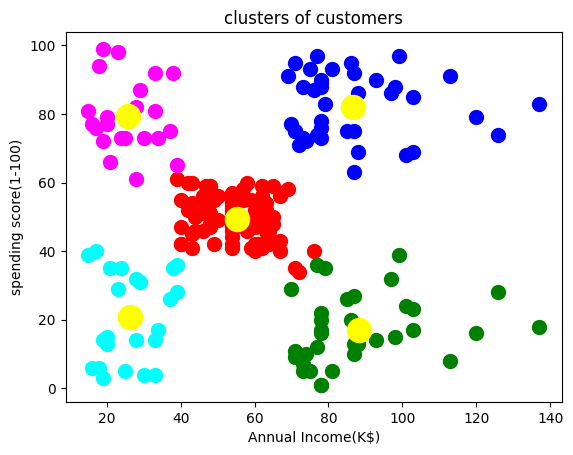

In [11]:
#visualise the cluster
plt.scatter(x[y_kmeans ==0,0],x[y_kmeans ==0,1],s=100,c='red', label='cluster1')
plt.scatter(x[y_kmeans ==1,0],x[y_kmeans ==1,1],s=100,c='blue', label='cluster2')
plt.scatter(x[y_kmeans ==2,0],x[y_kmeans ==2,1],s=100,c='green', label='cluster3')
plt.scatter(x[y_kmeans ==3,0],x[y_kmeans ==3,1],s=100,c='cyan', label='cluster4')
plt.scatter(x[y_kmeans ==4,0],x[y_kmeans ==4,1],s=100,c='magenta', label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label="centroids")
plt.title('clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('spending score(1-100)')
plt.show()


## Cluster Visualization Analysis

The plot shows five clearly separated customer segments based on income
and spending behavior.

The yellow markers represent the cluster centroids, indicating the
average position of customers within each segment.


## Business Interpretation of Customer Segments

### Cluster 1 – Low Income, Low Spending
Highly price-sensitive customers with minimal contribution to revenue.

### Cluster 2 – Average Income, Average Spending
Regular customers who respond well to standard marketing campaigns.

### Cluster 3 – High Income, Low Spending
Customers with strong purchasing power but low engagement.
Ideal targets for premium promotions.

### Cluster 4 – High Income, High Spending
Most valuable customers.
Should be retained through loyalty programs and exclusive offers.

### Cluster 5 – Low Income, High Spending
Impulsive buyers who respond well to discounts and promotional deals.


## Conclusion

K-Means clustering successfully segmented customers into meaningful groups
based on income and spending behavior.

These insights can help businesses implement targeted marketing strategies,
improve customer engagement, and increase overall profitability.
